In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re

In [2]:
bd_data = 'State_of_data_2022.csv'

dados = pd.read_csv(bd_data)
dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

In [3]:
dados.shape

(4271, 352)

In [4]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [5]:
# Função que renomeia as colunas dos data frames (recebe o data frame e a lista com os novos nomes)
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [6]:
# Função retira as linhas nulas
def tira_linhas_na(data_frame):
    data_frame.dropna(inplace=True)
    return data_frame

In [7]:
#Função cria um gráfico de barras empilhados passando de informação a base e os títulos.
#Titulos recebe strings com as informações (título do grafico, título eixo x, título eixo y).

def grafico_em_bar_empilhado(data_frame, lista_de_titulos):
    frequencia = data_frame.sum()
    frequencia_dicionario = {'Opcao': frequencia.index, 'Sim': frequencia.values}
    df_frequencia = pd.DataFrame(frequencia_dicionario)
    df_frequencia['Não'] = data_frame.shape[0] - df_frequencia['Sim']
    df_frequencia.set_index('Opcao', inplace = True)

    fig, ax = plt.subplots()

    ax.bar(df_frequencia.index, df_frequencia['Sim'], label = "Sim", color = '#6F9BB4')
    ax.bar(df_frequencia.index, df_frequencia['Não'], bottom = df_frequencia['Sim'], label = "Não", color = '#C2E5D7')

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() / 2 + bar.get_y(),
                round(bar.get_height()), ha = 'center',
                color = '#010409', weight = 'bold', size = 10)

    plt.title(lista_de_titulos[0])
    plt.xlabel(lista_de_titulos[1])
    plt.ylabel(lista_de_titulos[2])
    plt.xticks(rotation = 45, ha = 'right')

    ax.legend(loc = 'upper right')

    plt.show()


**1- Dados Demográficos**


Analisando dados / tratamento

In [8]:
df_demografico1 = cria_df([0, 16])
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1.columns

Index(['('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_g ', 'vive_no_brasil')',
       '('P1_i ', 'Estado onde mora')', '('P1_i_1 ', 'uf onde mora')',
       '('P1_i_2 ', 'Regiao onde mora')', '('P1_j ', 'Mudou de Estado?')',
       '('P1_k ', 'Regiao de origem')', '('P1_l ', 'Nivel de Ensino')',
       '('P1_m ', 'Área de Formação')',
       '('P2_a ', 'Qual sua situação atual de trabalho?')'],
      dtype='object')

In [9]:
novos_nomes1 = ['Idade','Faixa_idade','Genero','Cor_raca_etnia','PCD','vive_no_brasil','Estado_onde_mora','uf_onde_mora','Regiao_onde_mora','Mudou_de_Estado?','Regiao_de_origem','Nivel_de_Ensino','Área_de_Formação','Qual_sua_situação_atual_de_trabalho?']

renomeia_coluna_df(df_demografico1,novos_nomes1)
df_demografico1.head()

,idade,faixa_idade,genero,cor_raca_etnia,pcd,vive_no_brasil,estado_onde_mora,uf_onde_mora,regiao_onde_mora,mudou_de_estado?,regiao_de_origem,nivel_de_ensino,área_de_formação,qual_sua_situação_atual_de_trabalho?
0,39.0,35-39,Masculino,Parda,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público
1,32.0,30-34,Masculino,Parda,Não,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT)
2,53.0,50-54,Masculino,Branca,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,27.0,25-29,Masculino,Branca,Não,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT)
4,46.0,45-49,Feminino,Branca,Não,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público


In [10]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   idade                                 4197 non-null   float64
 1   faixa_idade                           4271 non-null   object 
 2   genero                                4262 non-null   object 
 3   cor_raca_etnia                        4271 non-null   object 
 4   pcd                                   4271 non-null   object 
 5   vive_no_brasil                        4271 non-null   bool   
 6   estado_onde_mora                      4156 non-null   object 
 7   uf_onde_mora                          4156 non-null   object 
 8   regiao_onde_mora                      4171 non-null   object 
 9   mudou_de_estado?                      4171 non-null   object 
 10  regiao_de_origem                      772 non-null    object 
 11  nivel_de_ensino  

In [11]:
df_demografico1.shape

(4271, 14)

In [12]:
df_demografico1.isnull().sum()

idade                                     74
faixa_idade                                0
genero                                     9
cor_raca_etnia                             0
pcd                                        0
vive_no_brasil                             0
estado_onde_mora                         115
uf_onde_mora                             115
regiao_onde_mora                         100
mudou_de_estado?                         100
regiao_de_origem                        3499
nivel_de_ensino                            0
área_de_formação                         122
qual_sua_situação_atual_de_trabalho?       0
dtype: int64

In [13]:
df_demografico1.describe()

,idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


In [14]:
#df_demografico1.dropna(subset=["genero"],inplace=True)

In [15]:
df_demografico1["genero"].unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

In [16]:
df_demografico1.loc[df_demografico1["genero"].isnull()] = "Prefiro não informar"

In [17]:
df_demografico1["idade"].unique()

array([39.0, 32.0, 53.0, 27.0, 46.0, 21.0, 31.0, 33.0, nan, 25.0, 24.0,
       35.0, 28.0, 29.0, 26.0, 37.0, 34.0, 40.0, 18.0, 30.0, 38.0, 48.0,
       43.0, 44.0, 50.0, 22.0, 36.0, 51.0, 20.0, 23.0, 42.0, 47.0, 41.0,
       45.0, 'Prefiro não informar', 54.0, 49.0, 52.0, 19.0], dtype=object)

In [18]:
media_nao_inf1 = df_demografico1.loc[(df_demografico1["genero"] == "Prefiro não informar") & (df_demografico1["idade"] != "Prefiro não informar"),"idade"].mean()

In [19]:
media_masc1 = df_demografico1.loc[df_demografico1["genero"] == "Masculino", "idade"].mean()

In [20]:
media_fem1 = df_demografico1.loc[df_demografico1["genero"] == "Feminino", "idade"].mean()

In [21]:
#df_demografico1[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"),"idade"] = media_fem1 - precisa do .loc
# Substitua as idades nulas das mulheres pela média calculada
df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"), "idade"] = int(media_fem1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Masculino"), "idade"] = int(media_masc1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Prefiro não informar"), "idade"] = int(media_nao_inf1)

In [22]:
indices_remover1 = df_demografico1[df_demografico1["idade"] == "Prefiro não informar"].index
df_demografico1.drop(indices_remover1,inplace=True)

In [23]:
df_demografico1["idade"] = df_demografico1["idade"].astype(int)


In [24]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4262 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   idade                                 4262 non-null   int32 
 1   faixa_idade                           4262 non-null   object
 2   genero                                4262 non-null   object
 3   cor_raca_etnia                        4262 non-null   object
 4   pcd                                   4262 non-null   object
 5   vive_no_brasil                        4262 non-null   object
 6   estado_onde_mora                      4147 non-null   object
 7   uf_onde_mora                          4147 non-null   object
 8   regiao_onde_mora                      4162 non-null   object
 9   mudou_de_estado?                      4162 non-null   object
 10  regiao_de_origem                      770 non-null    object
 11  nivel_de_ensino                    

Nivel de ensino x Situação de Trabalho


In [25]:
df_demografico1["qual_sua_situação_atual_de_trabalho?"].unique()

array(['Servidor Público', 'Empregado (CLT)',
       'Trabalho na área Acadêmica/Pesquisador',
       'Empreendedor ou Empregado (CNPJ)',
       'Desempregado, buscando recolocação', 'Estagiário',
       'Prefiro não informar', 'Somente Estudante (pós-graduação)',
       'Freelancer', 'Desempregado e não estou buscando recolocação',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Somente Estudante (graduação)',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil'],
      dtype=object)

In [26]:
df_demografico1["nivel_de_ensino"].unique()

array(['Pós-graduação', 'Graduação/Bacharelado', 'Doutorado ou Phd',
       'Estudante de Graduação', 'Mestrado', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [27]:
df_demografico11 = df_demografico1.copy()


In [28]:
#Agrupando formação
agrupar_graduacao1 = ["Pós-graduação", "Graduação/Bacharelado", "Doutorado ou Phd", "Mestrado"]
df_demografico11["nivel_de_ensino"].replace(agrupar_graduacao1, "Ensino superior Completo", inplace=True)

df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Estudante de Graduação"), "nivel_de_ensino"] = "Estudante"

df_demografico11['nivel_de_ensino'].unique()

array(['Ensino superior Completo', 'Estudante',
       'Não tenho graduação formal', 'Prefiro não informar'], dtype=object)

In [29]:
#Agrupando situação de trabalho
agrupar_trabalho1A = ["Empreendedor ou Empregado (CNPJ)", "Freelancer"]
agrupar_trabalho1B = ["Servidor Público","Empregado (CLT)"]
agrupar_trabalho1C = ["Desempregado, buscando recolocação","Desempregado e não estou buscando recolocação"]
agrupar_trabalho1D = ["Somente Estudante (pós-graduação)","Somente Estudante (graduação)","Trabalho na área Acadêmica/Pesquisador"]
agrupar_trabalho1E = ["Vivo fora do Brasil e trabalho para empresa de fora do Brasil","Vivo no Brasil e trabalho remoto para empresa de fora do Brasil"]

df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1A, "PJ", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1B, "CLT e Estatutário", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1C, "Desempregado", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1D, "Estudante e Pesquisador", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1E, "Trabalho fora do Brasil", inplace=True)

df_demografico11['qual_sua_situação_atual_de_trabalho?'].unique()

array(['CLT e Estatutário', 'Estudante e Pesquisador', 'PJ',
       'Desempregado', 'Estagiário', 'Prefiro não informar',
       'Trabalho fora do Brasil'], dtype=object)

In [30]:
pivot_table1 = pd.pivot_table(df_demografico11, 
                             index='qual_sua_situação_atual_de_trabalho?', 
                             columns='nivel_de_ensino', 
                             aggfunc='size', 
                             fill_value=0)
# 'aggfunc' é a função de agregação para contar as ocorrências (size),
# fill_value preenche os valores ausentes com 0.

pivot_table1

nivel_de_ensino,Ensino superior Completo,Estudante,Não tenho graduação formal,Prefiro não informar
qual_sua_situação_atual_de_trabalho?,,,,
CLT e Estatutário,2575,282,53,4
Desempregado,267,77,18,2
Estagiário,44,140,2,0
Estudante e Pesquisador,136,66,8,1
PJ,382,42,22,2
Prefiro não informar,16,3,2,3
Trabalho fora do Brasil,109,1,5,0


In [31]:
#tratando o nivel de ensino "não tenho graduação formal"
df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Não tenho graduação formal") & (df_demografico11["qual_sua_situação_atual_de_trabalho?"] == "Estagiário"), "nivel_de_ensino"] = "Estudante"

In [32]:
df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Não tenho graduação formal") & (df_demografico11["qual_sua_situação_atual_de_trabalho?"] == "Estudante e Pesquisador"), "nivel_de_ensino"] = "Estudante"


Area de formação x Genero

In [33]:
df_demografico1['área_de_formação'].unique()

array(['Computação / Engenharia de Software / Sistemas de Informação/ TI',
       'Outras Engenharias',
       'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
       'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde',
       'Ciências Sociais',
       'Economia/ Administração / Contabilidade / Finanças/ Negócios',
       'Marketing / Publicidade / Comunicação / Jornalismo', nan,
       'Química / Física', 'Outra opção'], dtype=object)

In [34]:
df_demografico1['área_de_formação'].isnull().sum()

122

In [35]:
df_demografico1.loc[df_demografico1["área_de_formação"].isnull(), "área_de_formação"] = "Prefiro não informar"

In [36]:
pivot_table11 = pd.pivot_table(df_demografico1, 
                             index='genero', 
                             columns='área_de_formação', 
                             aggfunc='size', 
                             fill_value=0)
pivot_table11

área_de_formação,Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,Ciências Sociais,Computação / Engenharia de Software / Sistemas de Informação/ TI,Economia/ Administração / Contabilidade / Finanças/ Negócios,Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,Marketing / Publicidade / Comunicação / Jornalismo,Outra opção,Outras Engenharias,Prefiro não informar,Química / Física
genero,,,,,,,,,,
Feminino,53,22,287,174,138,55,85,187,27,28
Masculino,57,49,1252,464,266,66,114,749,94,83
Prefiro não informar,1,0,2,2,1,1,0,3,1,1


Gráficos - Dados Demograficos

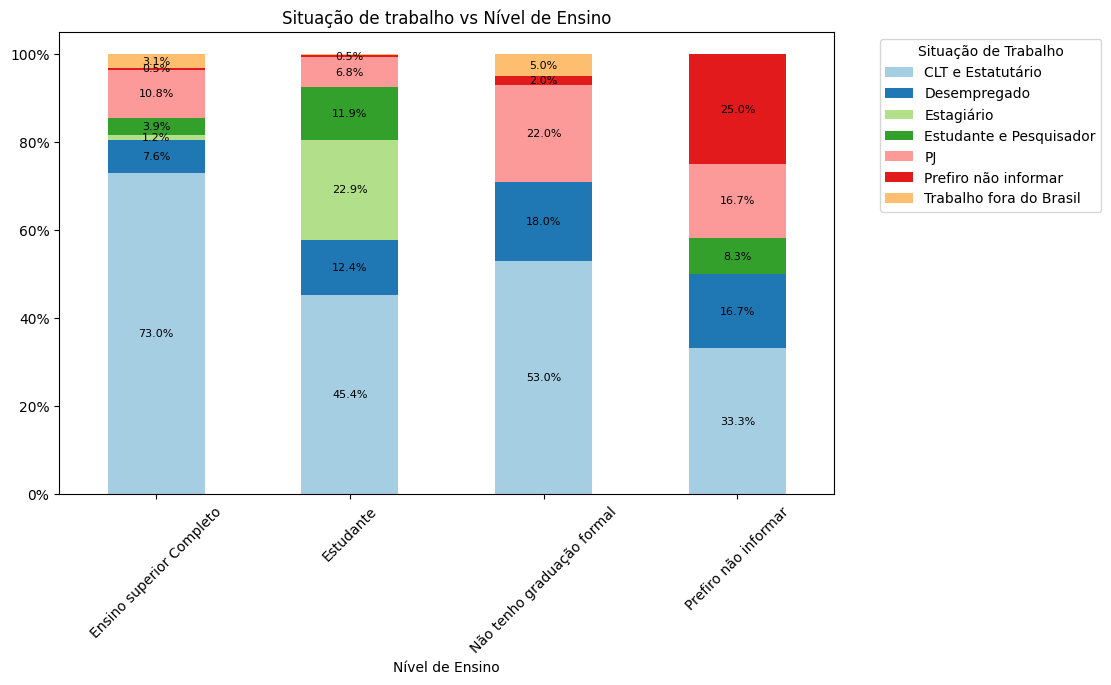

In [37]:
# Tabela de contagem cruzada das duas colunas
cross_tab1 = pd.crosstab(df_demografico11['nivel_de_ensino'],
                        df_demografico11['qual_sua_situação_atual_de_trabalho?'], 
                        normalize='index')  # Normaliza para obter porcentagens em relação às linhas

# Paleta de cores
palette1 = sns.color_palette("Paired")

# Gráfico de barras 100% empilhadas - precisa do stacked=True, se nao ele coloca uma barra ao lado da outra (False/Padrão)
ax = cross_tab1.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette1)

# Rótulos aos eixos e Título
plt.xlabel('Nível de Ensino')
plt.title('Situação de trabalho vs Nível de Ensino')

# Legenda fora da área do gráfico - bbox_to_anchor=(1.05, 1) define a posição
plt.legend(title='Situação de Trabalho', bbox_to_anchor=(1.05, 1), loc='upper left')

# Para exibir valores Y em porcentagem
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 representa 100%

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Colocar % no centro das nas barras e não mostrar porcentagens menores que 0,4%
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0.004:
        ax.annotate(f'{height*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)


plt.show()


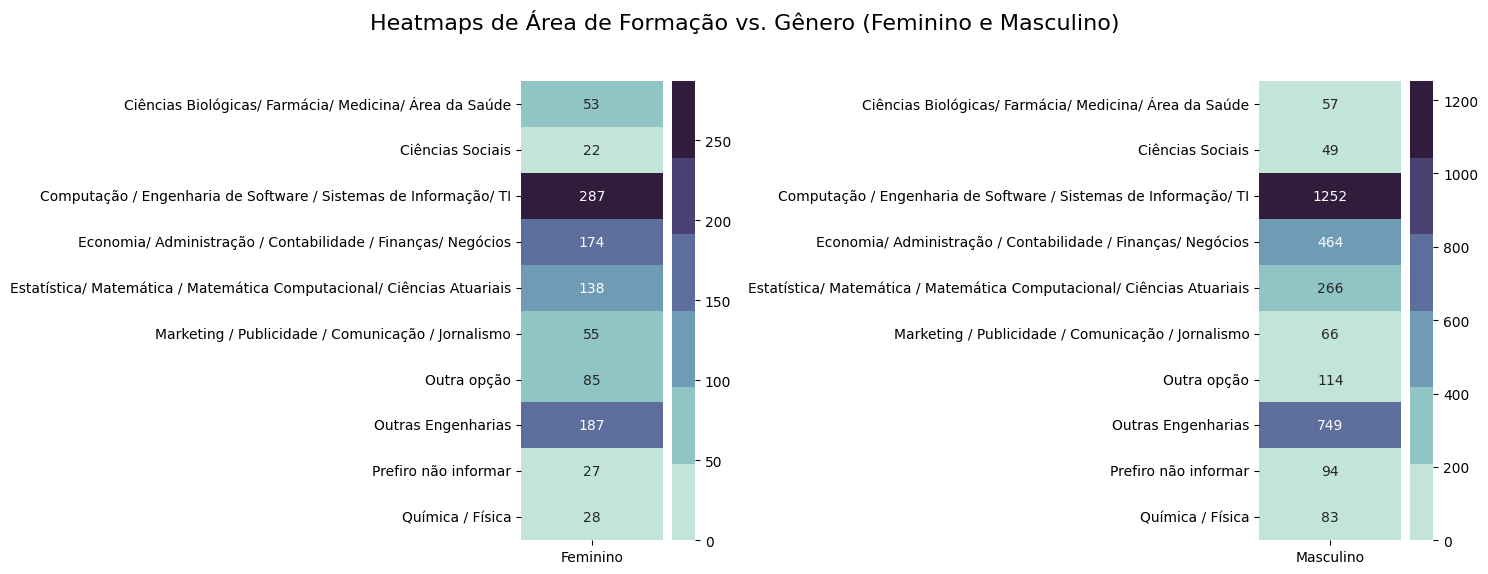

In [38]:
# Filtrar o DataFrame para considerar apenas o gênero "Feminino" e "Masculino"
df_feminino1 = df_demografico1[df_demografico1['genero'] == 'Feminino']
df_masculino2 = df_demografico1[df_demografico1['genero'] == 'Masculino']

# Criar tabela de contagem cruzada
heatmap_data_feminino1 = pd.crosstab(df_feminino1['área_de_formação'], df_feminino1['genero'])
heatmap_data_masculino1 = pd.crosstab(df_masculino2['área_de_formação'], df_masculino2['genero'])

# Paleta de cores para cubehelix_palette
palette11 = sns.cubehelix_palette(start=.5, rot=-.5)

# Definir os valores mínimos e máximos separados para as escalas de cores
vmin_feminino1 = 0
vmax_feminino1 = heatmap_data_feminino1.values.max()

vmin_masculino1 = 0
vmax_masculino1 = heatmap_data_masculino1.values.max()

# Criar uma unica figura com dois subplots - (1,2) lado a lado / (2,1) um em cima do outro
fig, axes = plt.subplots(1, 2, figsize=(15, 6), )

# Ajustar o espaçamento entre os subplots
fig.subplots_adjust(wspace=5)

# Criar os heatmaps em cada subplot com escalas de cores separadas
sns.heatmap(heatmap_data_feminino1, annot=True, cmap=palette11, fmt='d', vmin=vmin_feminino1, vmax=vmax_feminino1, ax=axes[0])
sns.heatmap(heatmap_data_masculino1, annot=True, cmap=palette11, fmt='d', vmin=vmin_masculino1, vmax=vmax_masculino1, ax=axes[1])

# Adicionar um título para ambos os heatmaps
fig.suptitle('Heatmaps de Área de Formação vs. Gênero (Feminino e Masculino)', fontsize=16)

# Rótulos aos eixos
axes[0].set_xlabel('')  # Vazio remove o rótulo do eixo
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Ajustar o layout para evitar sobreposição de rótulos, centralizar titulo e alinhar legendas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


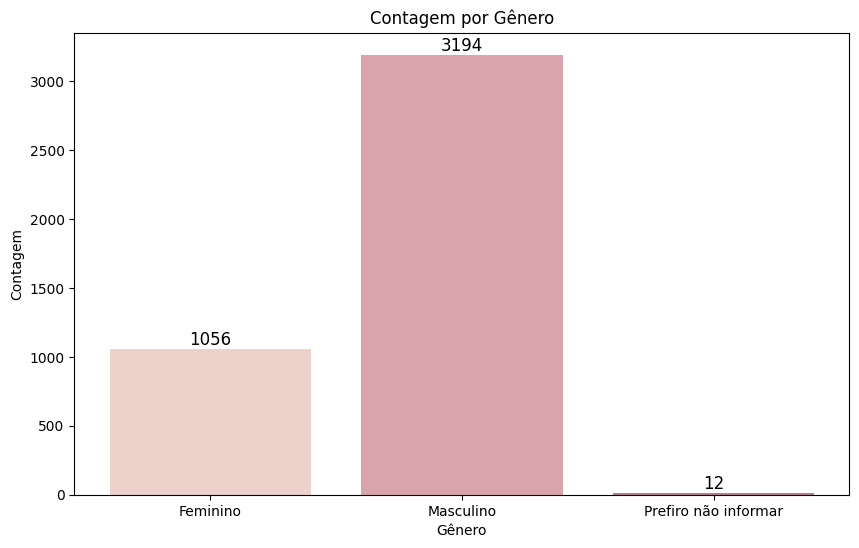

In [39]:
#Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero = df_demografico1.groupby("genero")["idade"].count()

#Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(grupo_genero.index, grupo_genero.values, color=sns.cubehelix_palette())

# Adicionar os números absolutos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12, color='black')

# Adicionar rótulos e título
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Contagem por Gênero")

plt.show()

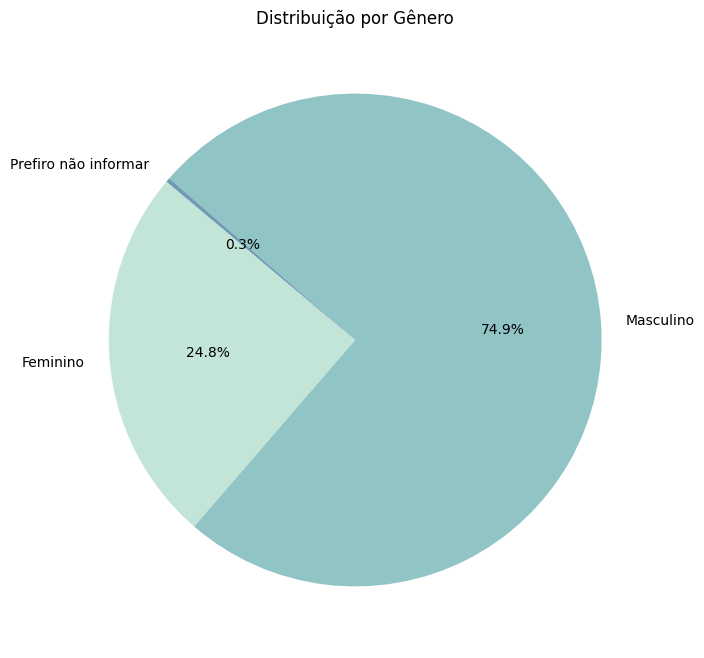

In [40]:
# Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero1 = df_demografico1.groupby("genero")["idade"].count()

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(grupo_genero1, labels=grupo_genero1.index, autopct='%1.1f%%', startangle=140, colors=sns.cubehelix_palette(start=.5, rot=-.5)
)

# Adicionar título
plt.title("Distribuição por Gênero")

# Adicionar os números absolutos nas bordas das fatias
for i, (wedge, label) in enumerate(zip(wedges, grupo_genero1.index)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 0.5 * wedge.r * np.cos(np.deg2rad(angle))
    y = 0.5 * wedge.r * np.sin(np.deg2rad(angle))
    #plt.text(x, y, f"{grupo_genero1[label]}", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

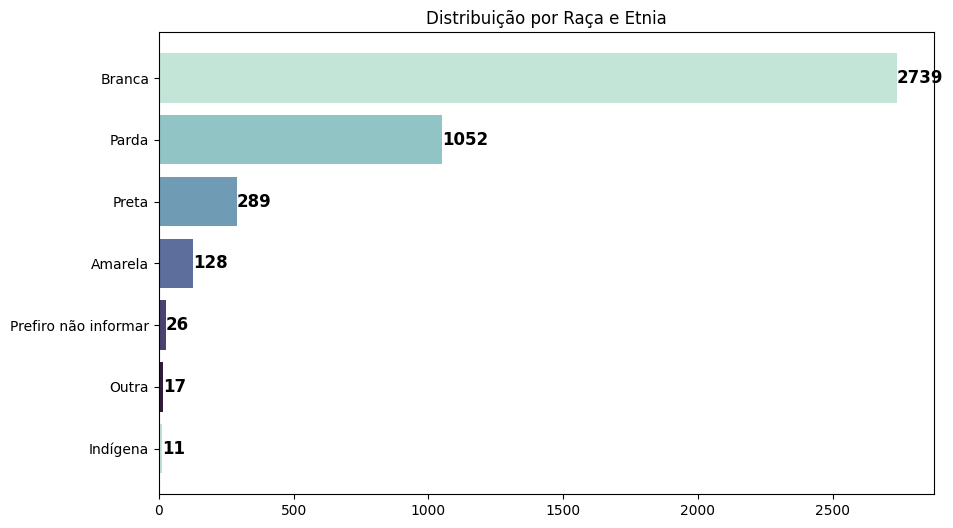

In [41]:
# Calcular a contagem de cada categoria na coluna 'cor_raca_etnia'
contagem_cor_raca1 = df_demografico1["cor_raca_etnia"].value_counts()

# Configurar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_cor_raca1.index, contagem_cor_raca1.values, color=sns.cubehelix_palette(start=.5, rot=-.5))

# Adicionar os valores acima das barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', color='black', fontsize=12, fontweight='bold')

# Adicionar rótulos e título
plt.xlabel("")
plt.ylabel("")
plt.title("Distribuição por Raça e Etnia")

# Inverter a ordem das categorias para ficar em ordem decrescente
plt.gca().invert_yaxis()

plt.show()

**2- Carreiras**


# Carreira na Área de Ciências de Dados

Para descrever e analisar a área de atuação da Ciência de Dados, foram utilizadas as partes 1 e 2 da base de dados.

Ao analisarmos a parte 2 da base, onde se encontravam as informações sobre as carreiras, observamos muitas perguntas sem respostas, no entanto, observamos alguns padrões de comportamento.

Buscamos nesta parte identificar:

a) Quais a situação de trabalho atual de cada respondente.

b) Quais os principais setores que utilizam profissionais da área de dados.

c) Quais os cargos com maior quantidade de pessoas na área de dados.

d) Quais os níveis de experência dos respondentes.

e) Quais os principais motivos de insatisfação dos profissionais na carreira (geral e por gênero).

f) Quais os principais critérios para escolha de uma vaga de emprego (geral e por gênero)

In [42]:
# Trabalhando com as colunas da Parte 2

parte2_columns = dados.columns[dados.columns.str.startswith("('P2")] # Selecionar as colunas que começam com P2
qtd_parte2_columns = len(parte2_columns) # Quantidade de colunas da parte 2
indices_colunas_parte_2 = [dados.columns.get_loc(col) for col in parte2_columns] # Obter os índices das colunas da Parte 2

# Criar um novo DataFrame com as colunas da Parte 2
data_parte_2 = dados.iloc[:, indices_colunas_parte_2]

# Dicionário para mapear colunas para perguntas
coluna_para_pergunta = {}

# Preencher o dicionário com os nomes das perguntas
for col in parte2_columns:
    match = re.search(r"', '(.*?)'\)", col)
    if match:
        pergunta = match.group(1)
        coluna_para_pergunta[col] = pergunta

# Imprimir o dicionário de mapeamento
 #for col, pergunta in coluna_para_pergunta.items():
 #    print(f"Coluna: {col}, Pergunta: {pergunta}")

# Criar uma lista com todas as perguntas da Parte 2
todas_perguntas_parte_2 = list(coluna_para_pergunta.values())
#print(todas_perguntas_parte_2)

# Imprimir a lista de perguntas
 #for idx, pergunta in enumerate(todas_perguntas_parte_2, start=1):
 #   print(f"Pergunta {idx}: {pergunta}")


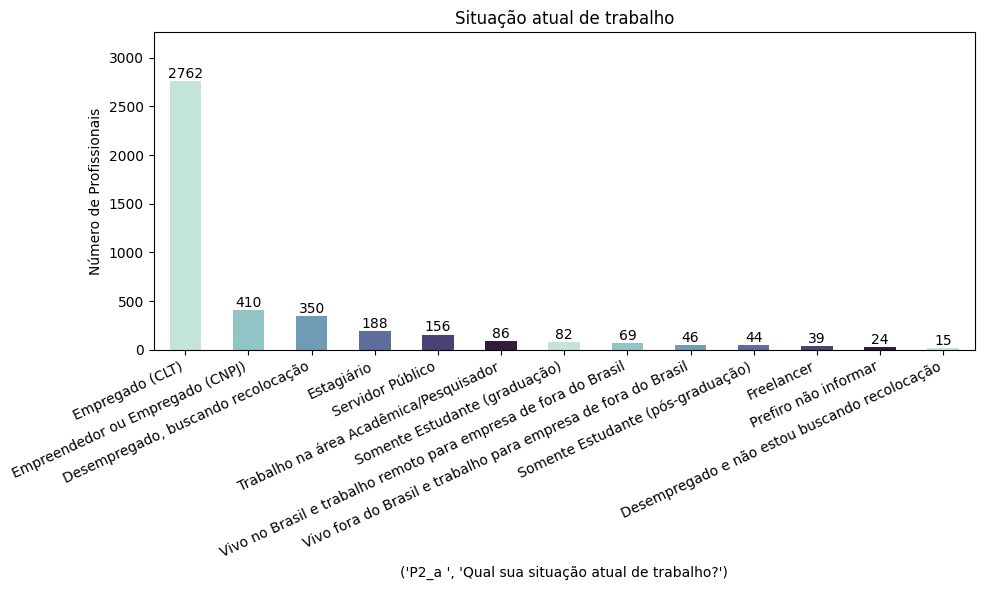

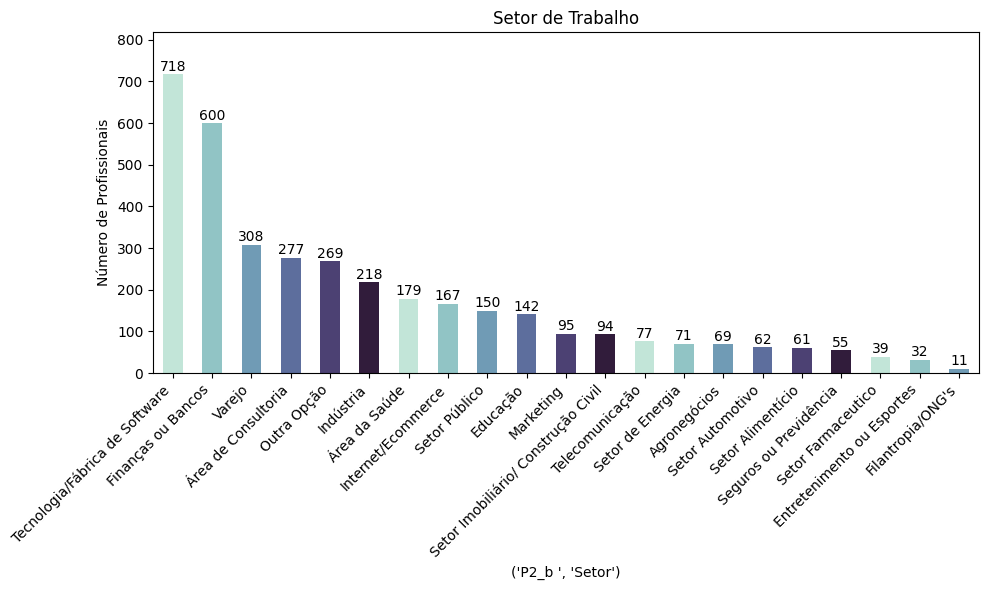

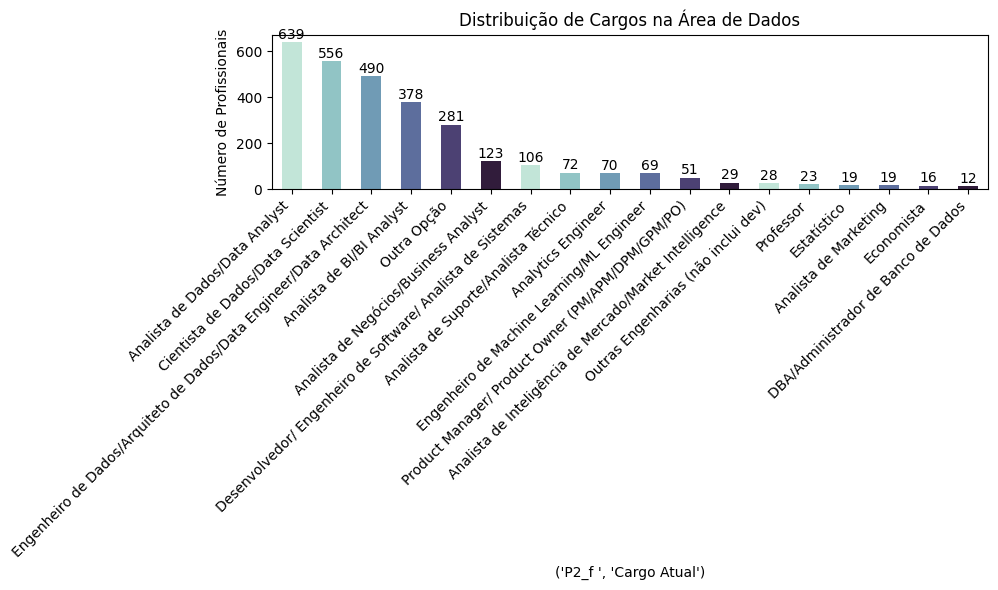

In [43]:
# Situação de Trabalho
contagem_cargos = data_parte_2["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Situação atual de trabalho')

plt.ylabel('Número de Profissionais')
plt.xticks(rotation=25, ha="right")  # Ajusta o ângulo e o alinhamento dos rótulos
ax.set_xticklabels(contagem_cargos.index)  # Define os rótulos manualmente

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos) + 500)  # Aumenta a borda superior

plt.tight_layout()
plt.show()


# Setores
contagem_cargos = data_parte_2["('P2_b ', 'Setor')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Setor de Trabalho')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_cargos.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos) + 100)  # Aumenta a borda superior

plt.tight_layout()
plt.show()



# Distribuição de cargos
contagem_cargos = data_parte_2["('P2_f ', 'Cargo Atual')"].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color=sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Distribuição de Cargos na Área de Dados')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


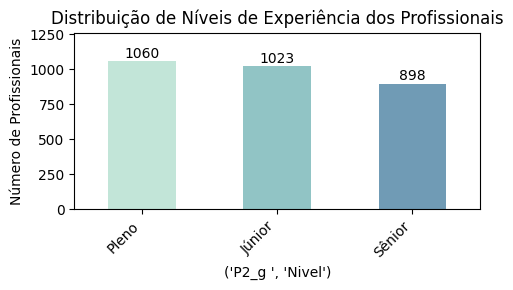

In [44]:
# Distribuição de níveis de experiência
contagem_niveis = data_parte_2["('P2_g ', 'Nivel')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(5, 3))
ax = contagem_niveis.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Distribuição de Níveis de Experiência dos Profissionais')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_niveis.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_niveis):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_niveis) + 200)  # Aumenta a borda superior

plt.tight_layout()
plt.show()

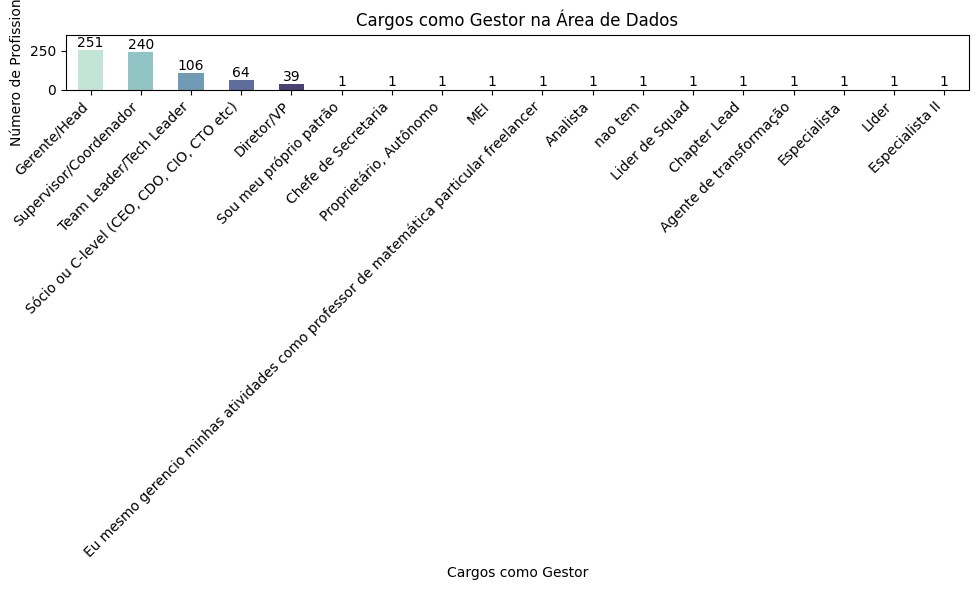

In [45]:
# Contagem dos cargos relacionados a posições de gestão
contagem_cargos_gestao = data_parte_2["('P2_e ', 'Cargo como Gestor')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos_gestao.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Cargos como Gestor na Área de Dados')
plt.xlabel('Cargos como Gestor')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_cargos_gestao.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos_gestao):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos_gestao) + 100)  # Aumenta a borda superior

plt.tight_layout()
plt.show()

In [46]:
#leitura da Base de Dados em CSV
DataFrame02 = pd.read_csv("State_of_data_2022.csv", header = 0)

TRATAMENTO DE DADOS

In [47]:
#Cópia do DataFrame inicial para realizar os devidos tratamentos
DataFrame02_tratado = DataFrame02.copy()

In [48]:
#Selecionar colunas para trabalho - loc[linhas, colunas]
DataFrame02_tratado = DataFrame02_tratado.loc[:,"('P0', 'id')":"('P2_s ', 'Sua empresa passu por Layoff em 2022?')"]

#Excluir colunas que não iremos trabalhar
DataFrame02_tratado = DataFrame02_tratado.drop(columns=["('P0', 'id')",
                                                        "('P1_a_1 ', 'Faixa idade')",
                                                        "('P1_e ', 'experiencia_profissional_prejudicada')",
                                                        "('P1_f ', 'aspectos_prejudicados')",
                                                        "('P1_i ', 'Estado onde mora')",
                                                        "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
                                                        "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')",
                                                        "('P2_s ', 'Sua empresa passu por Layoff em 2022?')"])

#Substituir os espaços dos nomes da colunas por "_"
DataFrame02_tratado.columns  = DataFrame02_tratado.columns.str.replace(' ', '_')


In [49]:
# Função que renomeia as colunas dos data frames (recebe o data frame e a lista com os novos nomes)
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

novos_nomes02 = ['Idade','Genero','Cor_raca_etnia','PCD','Vive_no_brasil','uf_onde_mora','Regiao_onde_mora','Mudou_de_Estado',
                 'Regiao_de_origem','Nivel_de_Ensino','Area_de_Formacao','Situacao_atual_de_trabalho', 'Setor', 'Num_Funcionarios',
                 'Gestor','Cargo_como_gestor','Cargo_atual','Nivel','Faixa_Salarial','Tempo_experiencia_area_de_dados',
                 'Tempo_experiencia_area_TI/Engenharia-Software_antes_de_trabalhar_com_area_de_dados', 
                 'Satisfeito_na_empresa_atual','Mot-Insatisfacao_Falta_de_oportunidade_de_crescimento_no_emprego_atual',
                 'Mot-Insatisfacao_Salario_atual_nao_corresponde_ao_mercado','Mot-Insatisfacao_Nao_tenho_boa_relacao_com_meu_lider/gestor', 
                 'Mot-Insatisfacao_Gostaria_de_trabalhar_em_outra_area_de_atuacao', 
                 'Mot-Insatisfacao_Gostaria_de_receber_mais_beneficios', 'Mot-Insatisfacao_Clima_de_trabalho/ambiente_nao_e_bom', 
                 'Mot-Insatisfacao_Falta_de_maturidade_analitica_na_empresa', 'Participou_de_entrevistas_de_emprego_ultimos_6_meses',
                 'Pretende_mudar_de_emprego_proximos_6_meses','crit-decidir-trabalhar_Remuneração/Salario','crit-decidir-trabalhar_Beneficios',
                 'crit-decidir-trabalhar_Proposito_do_trabalho_e_empresa', 'crit-decidir-trabalhar_Flexibilidade_trabalho_remoto',
                 'crit-decidir-trabalhar_Ambiente_e_clima_de_trabalho', 'crit-decidir-trabalhar_Oportunidade_de_aprendizado_e_trabalhar_com_referencias_na_area', 
                 'crit-decidir-trabalhar_Plano_de_carreira_e_oportunidades_de_crescimento_profissional', 'crit-decidir-trabalhar_Maturidade_da_empresa_em_termos_de_tecnologia_e_dados',
                 'crit-decidir-trabalhar_Qualidade_dos_gestores_e_líderes','crit-decidir-trabalhar_Reputacao_da_empresa_no_mercado','forma_de_trabalho_atual','Forma_de_trabalho_ideal',
                 'Atitude_caso_empresa_decida_pelo_modelo_100%_presencial']

DataFrame02_tratado = renomeia_coluna_df(DataFrame02_tratado,novos_nomes02)

In [50]:
#Alterar tipo da coluna idade de float para Int64
DataFrame02_tratado["idade"] = DataFrame02_tratado["idade"].astype('Int64')

colunas_para_alterar_tipo = ["mot-insatisfacao_falta_de_oportunidade_de_crescimento_no_emprego_atual",
                             "mot-insatisfacao_salario_atual_nao_corresponde_ao_mercado",
                             "mot-insatisfacao_nao_tenho_boa_relacao_com_meu_lider/gestor",
                             "mot-insatisfacao_gostaria_de_trabalhar_em_outra_area_de_atuacao",
                             "mot-insatisfacao_gostaria_de_receber_mais_beneficios",
                             "mot-insatisfacao_clima_de_trabalho/ambiente_nao_e_bom",
                             "mot-insatisfacao_falta_de_maturidade_analitica_na_empresa",
                             "crit-decidir-trabalhar_remuneração/salario",
                             "crit-decidir-trabalhar_beneficios",
                             "crit-decidir-trabalhar_proposito_do_trabalho_e_empresa",
                             "crit-decidir-trabalhar_flexibilidade_trabalho_remoto",
                             "crit-decidir-trabalhar_ambiente_e_clima_de_trabalho",
                             "crit-decidir-trabalhar_oportunidade_de_aprendizado_e_trabalhar_com_referencias_na_area",
                             "crit-decidir-trabalhar_plano_de_carreira_e_oportunidades_de_crescimento_profissional",
                             "crit-decidir-trabalhar_maturidade_da_empresa_em_termos_de_tecnologia_e_dados",
                             "crit-decidir-trabalhar_qualidade_dos_gestores_e_líderes",
                             "crit-decidir-trabalhar_reputacao_da_empresa_no_mercado"]

#Alterar tipo das colunas listadas em colunas_para_alterar_tipo de float para Int64
DataFrame02_tratado[colunas_para_alterar_tipo] = DataFrame02_tratado[colunas_para_alterar_tipo].astype('Int64')

ANÁLISE DE DADOS

1. Motivos de Insatisfação

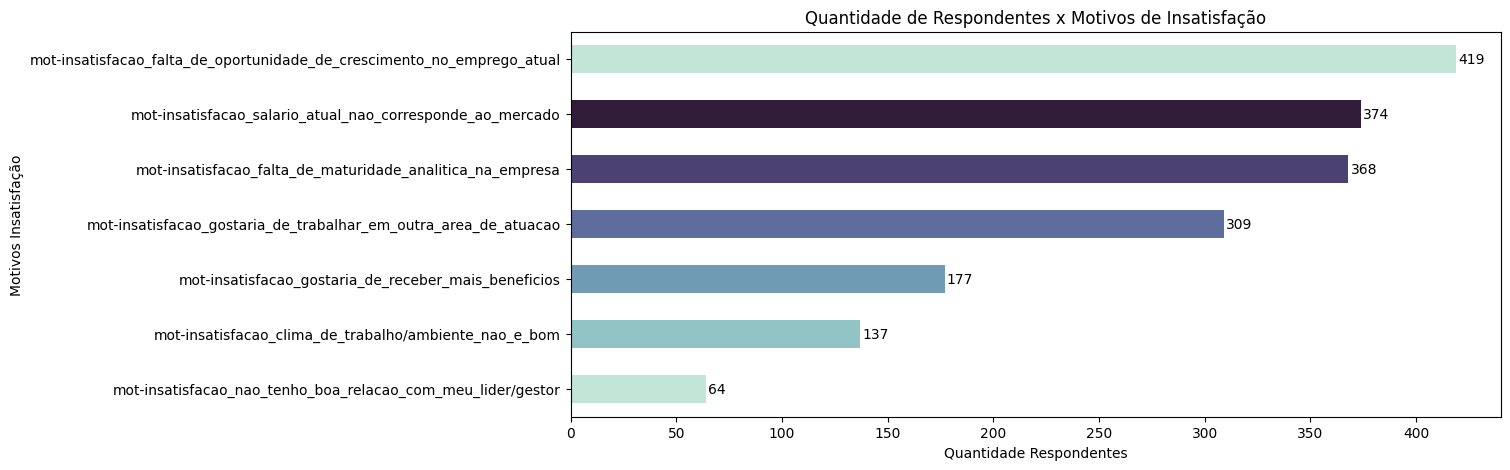

In [51]:
#Data Frame para análise
motivos_insatisfacao = DataFrame02_tratado[["mot-insatisfacao_falta_de_oportunidade_de_crescimento_no_emprego_atual",
                             "mot-insatisfacao_salario_atual_nao_corresponde_ao_mercado",
                             "mot-insatisfacao_nao_tenho_boa_relacao_com_meu_lider/gestor",
                             "mot-insatisfacao_gostaria_de_trabalhar_em_outra_area_de_atuacao",
                             "mot-insatisfacao_gostaria_de_receber_mais_beneficios",
                             "mot-insatisfacao_clima_de_trabalho/ambiente_nao_e_bom",
                             "mot-insatisfacao_falta_de_maturidade_analitica_na_empresa"]].copy()


# Determinar as somas de cada motivo de insatisfação
somas_motivos_insatisfacao = motivos_insatisfacao.sum().sort_values(ascending = True)

# Criar gráfico de barras

#Determinar o tamanho da figura
plt.figure(figsize=(12, 5))

#Atribuir o gráfico a uma variável
grafico_motivos = somas_motivos_insatisfacao.plot(kind='barh',color = sns.cubehelix_palette(start=.5, rot=-.5)) # gráfico de barrras horizontal

#Nomes dos eixos e do gráfico
plt.title('Quantidade de Respondentes x Motivos de Insatisfação')
plt.ylabel('Motivos Insatisfação')
plt.xlabel('Quantidade Respondentes')

#Formatação gráfico
plt.xticks(rotation=0) # Rotacionar em 90 graus o  rótulo do eixo x

# Adicionar valores acima das barras
for i, v in enumerate(somas_motivos_insatisfacao):
    grafico_motivos.text(v + 1, i, str(v), ha='left', va='center', fontsize=10)

#Mostrar gráfico
plt.show()


<Figure size 1200x500 with 0 Axes>

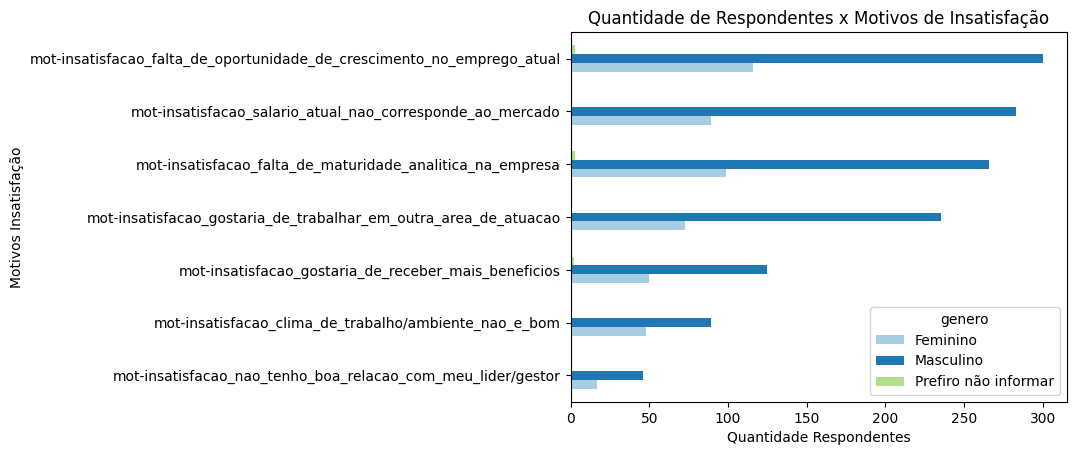

In [52]:
#Data Frame para análise
motivos_insatisfacao_por_genero = DataFrame02_tratado[["genero",
                             "mot-insatisfacao_falta_de_oportunidade_de_crescimento_no_emprego_atual",
                             "mot-insatisfacao_salario_atual_nao_corresponde_ao_mercado",
                             "mot-insatisfacao_nao_tenho_boa_relacao_com_meu_lider/gestor",
                             "mot-insatisfacao_gostaria_de_trabalhar_em_outra_area_de_atuacao",
                             "mot-insatisfacao_gostaria_de_receber_mais_beneficios",
                             "mot-insatisfacao_clima_de_trabalho/ambiente_nao_e_bom",
                             "mot-insatisfacao_falta_de_maturidade_analitica_na_empresa"]].copy()


# Determinar as somas de cada motivo de insatisfação
somas_motivos_insatisfacao_por_genero = motivos_insatisfacao_por_genero.pivot_table(index="genero", values=["mot-insatisfacao_falta_de_oportunidade_de_crescimento_no_emprego_atual",
                             "mot-insatisfacao_salario_atual_nao_corresponde_ao_mercado",
                             "mot-insatisfacao_nao_tenho_boa_relacao_com_meu_lider/gestor",
                             "mot-insatisfacao_gostaria_de_trabalhar_em_outra_area_de_atuacao",
                             "mot-insatisfacao_gostaria_de_receber_mais_beneficios",
                             "mot-insatisfacao_clima_de_trabalho/ambiente_nao_e_bom",
                             "mot-insatisfacao_falta_de_maturidade_analitica_na_empresa"], aggfunc='sum').transpose()

#Ordenação por ordem decrescente do valor total
somas_motivos_insatisfacao_por_genero = somas_motivos_insatisfacao_por_genero.sort_values(by=somas_motivos_insatisfacao_por_genero.columns[1], ascending=True)

# Criar gráfico de barras

#Determinar o tamanho da figura
plt.figure(figsize=(12, 5))

#Atribuir o gráfico a uma variável
grafico_motivos_por_genero = somas_motivos_insatisfacao_por_genero.plot(kind='barh',color=palette1) # gráfico de barrras horizontal

#Nomes dos eixos e do gráfico
plt.title('Quantidade de Respondentes x Motivos de Insatisfação')
plt.ylabel('Motivos Insatisfação')
plt.xlabel('Quantidade Respondentes')

#Formatação gráfico
plt.xticks(rotation=0) # Rotacionar em 90 graus o  rótulo do eixo x

  
#Mostrar gráfico
plt.show()


In [53]:
print(somas_motivos_insatisfacao_por_genero.sort_values(by=somas_motivos_insatisfacao_por_genero.columns[1], ascending=False))


genero                                              Feminino  Masculino  \
mot-insatisfacao_falta_de_oportunidade_de_cresc...       116        300   
mot-insatisfacao_salario_atual_nao_corresponde_...        89        283   
mot-insatisfacao_falta_de_maturidade_analitica_...        99        266   
mot-insatisfacao_gostaria_de_trabalhar_em_outra...        73        235   
mot-insatisfacao_gostaria_de_receber_mais_benef...        50        125   
mot-insatisfacao_clima_de_trabalho/ambiente_nao...        48         89   
mot-insatisfacao_nao_tenho_boa_relacao_com_meu_...        17         46   

genero                                              Prefiro não informar  
mot-insatisfacao_falta_de_oportunidade_de_cresc...                     3  
mot-insatisfacao_salario_atual_nao_corresponde_...                     1  
mot-insatisfacao_falta_de_maturidade_analitica_...                     3  
mot-insatisfacao_gostaria_de_trabalhar_em_outra...                     0  
mot-insatisfacao_gostari

**3- Área de Dados / Ciencia de Dados**


# Descrevendo a Área de Ciências de Dados

Para descrever e analisar a área de atuação da Ciência de Dados, foram utilizadas as partes 4 e 8 da base de dados.

Ao analisarmos a parte 4 da base, onde se encontravam os conhecimentos na área de dados,
identificamos algumas inconsistências e decidimos utilizar apenas as informações da área de atuação dos profissionais.

Na parte 8, realizamos uma análise descritiva detalhada da pesquisa, a qual aborda os conhecimentos e práticas relacionados à Ciência de Dados.
Inclui quatro perguntas-chave:

a) Quais das opções abaixo fazem parte da sua rotina no trabalho atual em ciência de dados?

b) Quais técnicas e métodos listados abaixo você costuma utilizar no trabalho?

c) Quais tecnologias dentre as listadas fazem parte do seu dia a dia como cientista de dados?

d) Entre as opções abaixo, em qual delas você investe a maior parte do seu tempo de trabalho?

In [54]:
df_P4 = cria_df([89, 91])
print(df_P4.columns)

Index(['('P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')', '('P4_a_1 ', 'Atuacao')'], dtype='object')


In [55]:
df_P8 = cria_df([302, 352])
print(df_P8.columns)

Index(['('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')',
       '('P8_a_1 ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')',
       '('P8_a_2 ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')',
       '('P8_a_3 ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')',
       '('P8_a_4 ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')',
       '('P8_a_5 ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')',
       '('P8_a_6 ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e ref

In [56]:
# P4 

# Criando o dataframe para a análise de atuação
novos_nomes_df_P4_a = ['Atuação']
df_P4_a = cria_df([90, 91])
renomeia_coluna_df(df_P4_a, novos_nomes_df_P4_a)

# Vendo quais são as possíveis atuações
df_P4_a['atuação'].unique()

array(['Engenharia de Dados', 'Gestor', 'Ciência de Dados',
       'Outra atuação', 'Análise de Dados',
       'Buscando oportunidade na área de dados'], dtype=object)

In [57]:
# Criando um data frame com as atuações e a quantidade de pessoas nela
numero_cd = df_P4_a[df_P4_a['atuação'] == 'Ciência de Dados'].shape[0]
numero_g = df_P4_a[df_P4_a['atuação'] == 'Gestor'].shape[0]
numero_ed = df_P4_a[df_P4_a['atuação'] == 'Engenharia de Dados'].shape[0]
numero_ad = df_P4_a[df_P4_a['atuação'] == 'Análise de Dados'].shape[0]
numero_oa = df_P4_a[df_P4_a['atuação'] == 'Outra atuação'].shape[0]
numero_b = df_P4_a[df_P4_a['atuação'] == 'Buscando oportunidade na área de dados'].shape[0]

atuacao_dicionario = {"Ciência de Dados": [numero_cd], "Gestor": [numero_g], "Engenharia de Dados": [numero_ed] , "Análise de Dados": [numero_ad], "Outra atuação": [numero_oa], "Buscando oportunidade na área de dados": [numero_b]}

df_atuacao = pd.DataFrame(atuacao_dicionario)

C:\Users\Amara\AppData\Local\Temp\ipykernel_14248\3261606427.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set2', len(graf_atuacao.index))


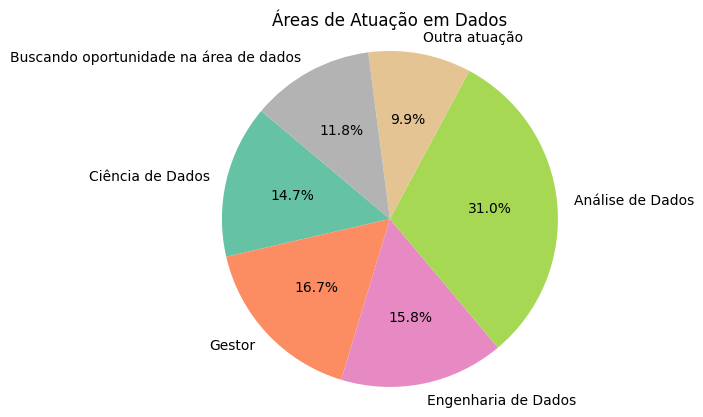

In [58]:
# Plotando um grafico de pizza
graf_atuacao = df_atuacao.sum()

colormap = plt.cm.get_cmap('Set2', len(graf_atuacao.index))
cores = colormap(np.arange(len(graf_atuacao.index)))

plt.pie(graf_atuacao.values, labels = graf_atuacao.index, autopct='%1.1f%%', startangle=140, colors = cores)

plt.title('Áreas de Atuação em Dados')
plt.axis('equal')

plt.show()

In [59]:
# P8

# Listas com os índices necessários para a criação de cada data frame
indices_P8_a = [303, 314]
indices_P8_b = [315, 328]
indices_P8_c = [329, 340]
indices_P8_d = [341, 352]

In [60]:
# Criando os data frames
df_P8_a = cria_df(indices_P8_a)
df_P8_b = cria_df(indices_P8_b)
df_P8_c = cria_df(indices_P8_c)
df_P8_d = cria_df(indices_P8_d)

In [61]:
# Listas para renomeação de colunas
novos_nomes_df_P8_a = ["Ad-hoc", "Coleta e Limpeza", "Contato Times", "Modelos Machine Learning", "Criar Pipelines", "Manutenção Machine Learning", "Construções Dashboards", "Ferramentas Avançadas Estatística", "Manutenção em ETLs", "Crio e gerencio Feature Store", "Criar e manter a infra modelos"]
novos_nomes_df_P8_b = ["Regressão Linear", "Redes Neurais ou Modelos Baseados em Árvore", "RecSys", "Métodos Bayesianos", "NLP", "Métodos Clássicos", "Cadeias de Markov ou HMM\'s", "Clusterização", "Séries Temporais", "Reinforcement Learning", "ML para Detecção de Fraude", "Visão Computacional", "Detecção de Churn"]
novos_nomes_df_P8_c = ["Ferramentas de BI", "Planilhas", "Desenvolvimento Local", "Desenvolvimento na Nuvem", "AutoML", "ETL", "Machine Learning", "Feature Store", "Controle de Versão", "Data Apps", "Estatística Avançada"]
novos_nomes_df_P8_d = ["Ad-hoc", "Coleta e Limpeza", "Contato Times", "Modelos Machine Learning", "Criar Pipelines", "Manutenção Machine Learning", "Construções Dashboards", "Ferramentas Avançadas Estatística", "Manutenção em ETLs", "Crio e gerencio Feature Store", "Criar e manter a infra modelos"]

In [62]:
# Renomeando colunas dos data frames
df_P8_a = renomeia_coluna_df(df_P8_a, novos_nomes_df_P8_a)
df_P8_b = renomeia_coluna_df(df_P8_b, novos_nomes_df_P8_b)
df_P8_c = renomeia_coluna_df(df_P8_c, novos_nomes_df_P8_c)
df_P8_d = renomeia_coluna_df(df_P8_d, novos_nomes_df_P8_d)

In [63]:
print(df_P8.describe())

'''
As respostas para as perguntas são dadas nas colunas subsequentes às perguntas, de forma binária.
Apenas aqueles que pertencem à área de Ciência de Dados responderam as perguntas desta seção que ao total foram 629 respostas.
Isso resultou em muitas linhas da base de dados com informações nulas em todas as colunas.
Não foi necessário realizar correções para valores fora do esperado.
'''

       ('P8_a_1 ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')  \
count                                         629.000000                                                                                                                                                              
mean                                            0.648649                                                                                                                                                              
std                                             0.477772                                                                                                                                                              
min                                             0.000000                                                                                    

'\nAs respostas para as perguntas são dadas nas colunas subsequentes às perguntas, de forma binária.\nApenas aqueles que pertencem à área de Ciência de Dados responderam as perguntas desta seção que ao total foram 629 respostas.\nIsso resultou em muitas linhas da base de dados com informações nulas em todas as colunas.\nNão foi necessário realizar correções para valores fora do esperado.\n'

In [64]:
# Tirando as linhas com NaN da parte 8
df_P8_a = tira_linhas_na(df_P8_a)
df_P8_b = tira_linhas_na(df_P8_b)
df_P8_c = tira_linhas_na(df_P8_c)
df_P8_d = tira_linhas_na(df_P8_d)

In [65]:
#Após o tratamento das informações, decidimos apresentar uma visualização mais clara e quantitativa das respostas utilizando um gráfico de barras empilhadas.

# Listas dos títulos para os gráficos da parte 8
titulos_df_P8_a = ["A - Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?", "Trabalhos Executados", "Quantidade de Pessoas"]
titulos_df_P8_b = ["B - Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?", "Técnicas e Métodos", "Quantidade de Pessoas"]
titulos_df_P8_c = ["C - Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?", "Tecnologias", "Quantidade de Pessoas"]
titulos_df_P8_d = ["D - Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?", "Trabalhos Executados", "Quantidade de Pessoas"]

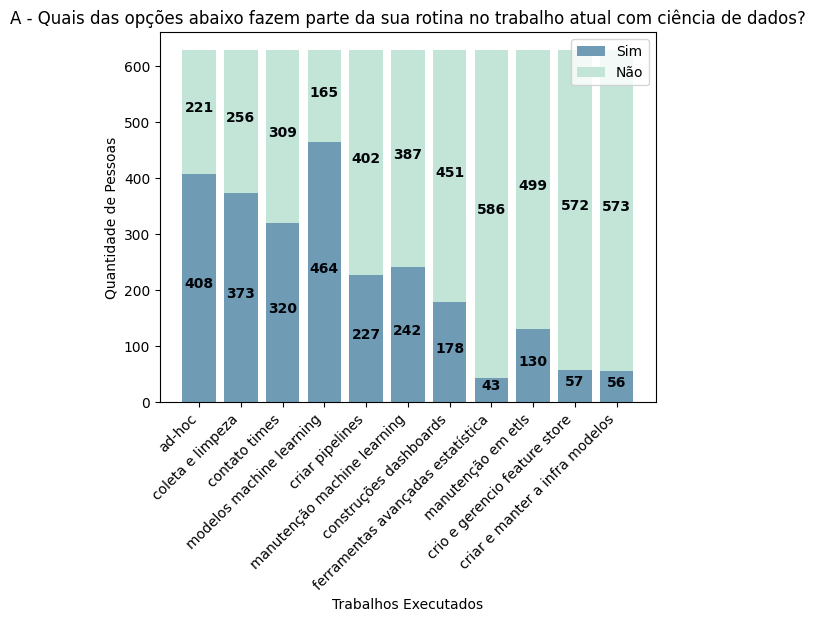

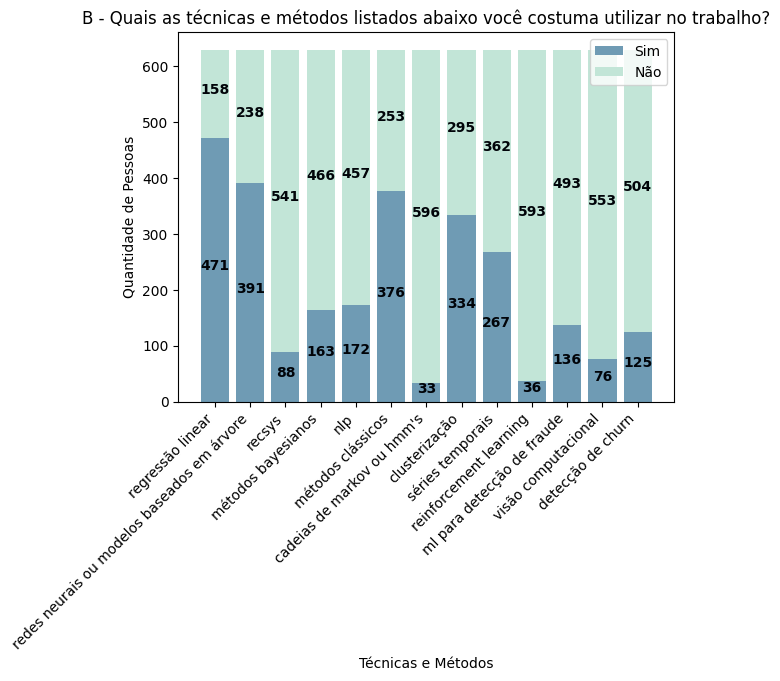

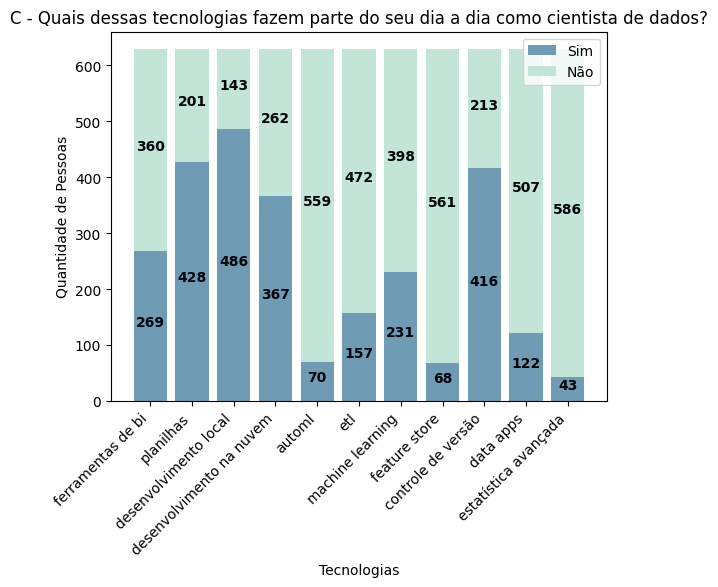

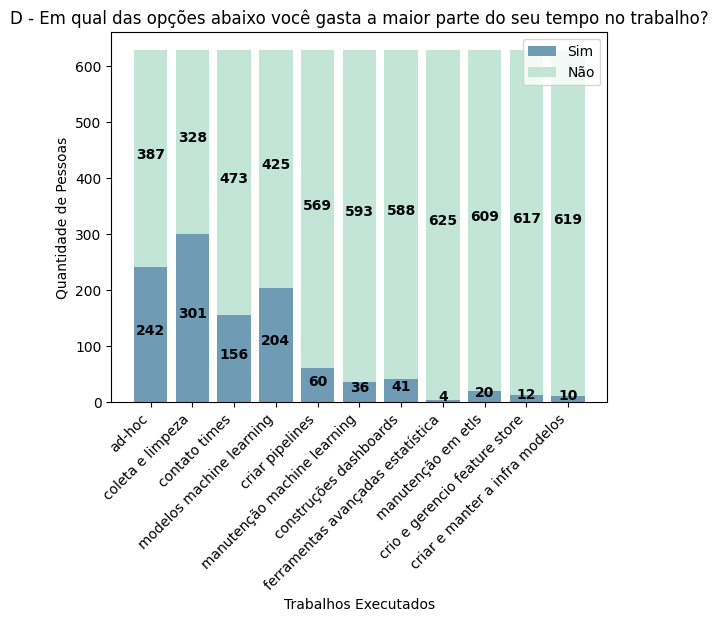

In [66]:
grafico_em_bar_empilhado(df_P8_a, titulos_df_P8_a)
grafico_em_bar_empilhado(df_P8_b, titulos_df_P8_b)
grafico_em_bar_empilhado(df_P8_c, titulos_df_P8_c)
grafico_em_bar_empilhado(df_P8_d, titulos_df_P8_d)